# **Final Project**

In [ ]:
import numpy as np
import pandas as pd
#!pip install numpy==1.25.0 #uncomment to run it and restart run time
df = pd.read_csv('landolt.txt', delimiter=' ')

In [ ]:
df.head()

,comp,"gfa{AM,AC,CR}"
0,Ag20Al25La55,AM
1,Ag15Al10Mg75,AM
2,Ag25Al10Mg65,AM
3,Ag25Al20Mg55,AM
4,Ag35Al10Mg55,AM


In [ ]:
#install matmier library
!pip install matminer

In [ ]:
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, "comp")
df.head()

StrToComposition:   0%|          | 0/6780 [00:00<?, ?it/s]

,comp,"gfa{AM,AC,CR}",composition
0,Ag20Al25La55,AM,"(Ag, Al, La)"
1,Ag15Al10Mg75,AM,"(Ag, Al, Mg)"
2,Ag25Al10Mg65,AM,"(Ag, Al, Mg)"
3,Ag25Al20Mg55,AM,"(Ag, Al, Mg)"
4,Ag35Al10Mg55,AM,"(Ag, Al, Mg)"


In [ ]:
from matminer.featurizers.composition import ElementProperty

ep_feat = ElementProperty.from_preset(preset_name="magpie")
df = ep_feat.featurize_dataframe(df, col_id="composition")  # input the "composition" column to the featurizer
df.head()

ElementProperty:   0%|          | 0/6780 [00:00<?, ?it/s]

,comp,"gfa{AM,AC,CR}",composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Ag20Al25La55,AM,"(Ag, Al, La)",13.0,57.0,44.0,44.00,15.500,57.0,13.0,...,0.0,0.0,0.0,0.0,194.0,225.0,31.0,207.95,15.345,194.0
1,Ag15Al10Mg75,AM,"(Ag, Al, Mg)",12.0,47.0,35.0,17.35,8.895,12.0,65.0,...,0.0,0.0,0.0,0.0,194.0,225.0,31.0,201.75,11.625,194.0
2,Ag25Al10Mg65,AM,"(Ag, Al, Mg)",12.0,47.0,35.0,20.85,13.075,12.0,65.0,...,0.0,0.0,0.0,0.0,194.0,225.0,31.0,204.85,14.105,194.0
3,Ag25Al20Mg55,AM,"(Ag, Al, Mg)",12.0,47.0,35.0,20.95,13.025,12.0,65.0,...,0.0,0.0,0.0,0.0,194.0,225.0,31.0,207.95,15.345,194.0
4,Ag35Al10Mg55,AM,"(Ag, Al, Mg)",12.0,47.0,35.0,24.35,15.855,12.0,65.0,...,0.0,0.0,0.0,0.0,194.0,225.0,31.0,207.95,15.345,194.0


In [ ]:
from matminer.featurizers.conversions import CompositionToOxidComposition
from matminer.featurizers.composition import OxidationStates

df = CompositionToOxidComposition().featurize_dataframe(df, "composition", ignore_errors=True)

os_feat = OxidationStates()
df = os_feat.featurize_dataframe(df, "composition_oxid", ignore_errors=True)
df.head()

CompositionToOxidComposition:   0%|          | 0/6780 [00:00<?, ?it/s]

OxidationStates:   0%|          | 0/6780 [00:00<?, ?it/s]

,comp,"gfa{AM,AC,CR}",composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
0,Ag20Al25La55,AM,"(Ag, Al, La)",13.0,57.0,44.0,44.00,15.500,57.0,13.0,...,225.0,31.0,207.95,15.345,194.0,"(Ag0+, Al0+, La0+)",0.0,0.0,0.0,0.0
1,Ag15Al10Mg75,AM,"(Ag, Al, Mg)",12.0,47.0,35.0,17.35,8.895,12.0,65.0,...,225.0,31.0,201.75,11.625,194.0,"(Ag0+, Al0+, Mg0+)",0.0,0.0,0.0,0.0
2,Ag25Al10Mg65,AM,"(Ag, Al, Mg)",12.0,47.0,35.0,20.85,13.075,12.0,65.0,...,225.0,31.0,204.85,14.105,194.0,"(Ag0+, Al0+, Mg0+)",0.0,0.0,0.0,0.0
3,Ag25Al20Mg55,AM,"(Ag, Al, Mg)",12.0,47.0,35.0,20.95,13.025,12.0,65.0,...,225.0,31.0,207.95,15.345,194.0,"(Ag0+, Al0+, Mg0+)",0.0,0.0,0.0,0.0
4,Ag35Al10Mg55,AM,"(Ag, Al, Mg)",12.0,47.0,35.0,24.35,15.855,12.0,65.0,...,225.0,31.0,207.95,15.345,194.0,"(Ag0+, Al0+, Mg0+)",0.0,0.0,0.0,0.0


In [ ]:
df.dropna(axis=0, how='any',inplace=True)
df.describe()

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
count,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,...,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000
mean,12.412885,40.713527,28.300642,25.361718,7.800118,25.420190,40.332079,72.270755,31.938676,58.582251,...,183.043834,224.928271,41.884437,210.888439,12.055917,213.025238,-0.263671,0.177109,0.440779,0.220142
std,6.542851,14.617513,13.996201,8.687664,4.793002,12.685964,17.477557,5.602888,16.746389,8.923108,...,39.659538,7.166728,40.215968,12.244847,12.147636,16.012818,0.965637,0.681645,1.620521,0.812517
min,4.000000,13.000000,0.000000,12.100000,0.000000,4.000000,7.000000,44.000000,0.000000,17.800000,...,2.000000,194.000000,0.000000,152.780000,0.000000,166.000000,-4.000000,0.000000,0.000000,0.000000
25%,6.000000,28.000000,17.000000,19.300000,4.100000,13.000000,19.000000,72.000000,18.000000,53.940000,...,166.000000,225.000000,31.000000,201.000000,5.580000,194.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,40.000000,24.000000,23.400000,6.825000,26.000000,44.000000,73.000000,28.000000,59.100000,...,194.000000,225.000000,31.000000,212.700000,10.680000,225.000000,0.000000,0.000000,0.000000,0.000000
75%,14.000000,57.000000,44.000000,29.760000,10.065000,28.000000,55.000000,77.000000,49.000000,64.920000,...,194.000000,229.000000,35.000000,221.900000,15.040000,225.000000,0.000000,0.000000,0.000000,0.000000
max,64.000000,79.000000,74.000000,67.750000,27.900000,79.000000,73.000000,83.000000,67.000000,74.380000,...,227.000000,229.000000,227.000000,228.700000,83.625000,229.000000,0.000000,5.000000,8.000000,5.142595


# **Model**

In [ ]:
y = df['gfa{AM,AC,CR}'].values
excluded = ["comp", "gfa{AM,AC,CR}", "composition", "composition_oxid"]
X = df.drop(excluded, axis=1)
print("There are {} possible descriptors:\n\n{}".format(X.shape[1], X.columns.values))

There are 136 possible descriptors:

['MagpieData minimum Number' 'MagpieData maximum Number'
 'MagpieData range Number' 'MagpieData mean Number'
 'MagpieData avg_dev Number' 'MagpieData mode Number'
 'MagpieData minimum MendeleevNumber' 'MagpieData maximum MendeleevNumber'
 'MagpieData range MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData avg_dev MendeleevNumber' 'MagpieData mode MendeleevNumber'
 'MagpieData minimum AtomicWeight' 'MagpieData maximum AtomicWeight'
 'MagpieData range AtomicWeight' 'MagpieData mean AtomicWeight'
 'MagpieData avg_dev AtomicWeight' 'MagpieData mode AtomicWeight'
 'MagpieData minimum MeltingT' 'MagpieData maximum MeltingT'
 'MagpieData range MeltingT' 'MagpieData mean MeltingT'
 'MagpieData avg_dev MeltingT' 'MagpieData mode MeltingT'
 'MagpieData minimum Column' 'MagpieData maximum Column'
 'MagpieData range Column' 'MagpieData mean Column'
 'MagpieData avg_dev Column' 'MagpieData mode Column'
 'MagpieData minimum Row' 'MagpieData maximum 

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = pd.Categorical(y).codes
X['comp'] = df['comp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
train_formula = X_train['comp']
X_train = X_train.drop('comp', axis=1)
test_formula = X_test['comp']
X_test = X_test.drop('comp', axis=1)

rf_cla = RandomForestClassifier(n_estimators=31, max_depth=21, random_state=1)
rf_cla.fit(X_train, y_train)

print('training accuracy = ' + str(round(rf_cla.score(X_train, y_train), 3)))
print('test accuracy = ' + str(round(rf_cla.score(X_test, y_test), 3)))

training accuracy = 0.984
test accuracy = 0.852


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Maximum Accuracy：0.855 Numbers of Subtrees：211


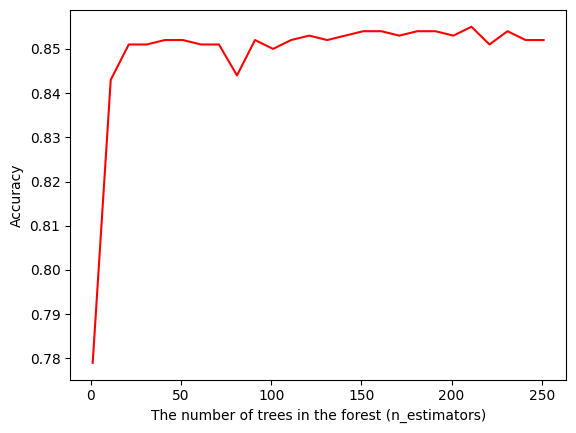

In [ ]:
score_lt = []

for i in range(0,260,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=1)
    rfc.fit(X_train, y_train)
    score = round(rfc.score(X_test, y_test), 3)
    score_lt.append(score)
score_max = max(score_lt)
print('Maximum Accuracy：{}'.format(score_max),
      'Numbers of Subtrees：{}'.format(score_lt.index(score_max)*10+1))

x = np.arange(1,261,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.ylabel('Accuracy')
plt.xlabel('The number of trees in the forest (n_estimators)')
plt.show()

Maximum Accuracy：0.855 Numbers of Subtrees：211


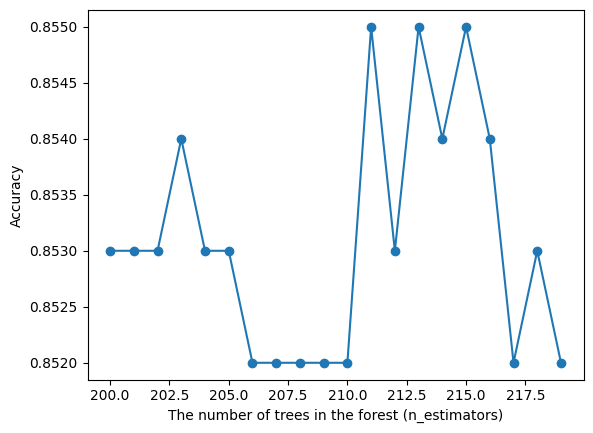

In [ ]:
score_lt = []

for i in range(200,220):
    rfc = RandomForestClassifier(n_estimators=i
                                ,random_state=1)
    rfc.fit(X_train, y_train)
    score = round(rfc.score(X_test, y_test), 3)
    score_lt.append(score)
score_max = max(score_lt)
print('Maximum Accuracy：{}'.format(score_max),
      'Numbers of Subtrees：{}'.format(score_lt.index(score_max)+200))

x = np.arange(200,220)
plt.subplot(111)
plt.plot(x, score_lt, 'o-')
plt.ylabel('Accuracy')
plt.xlabel('The number of trees in the forest (n_estimators)')
plt.show()

Maximum Accuracy：0.852 Numbers of Subtrees：63


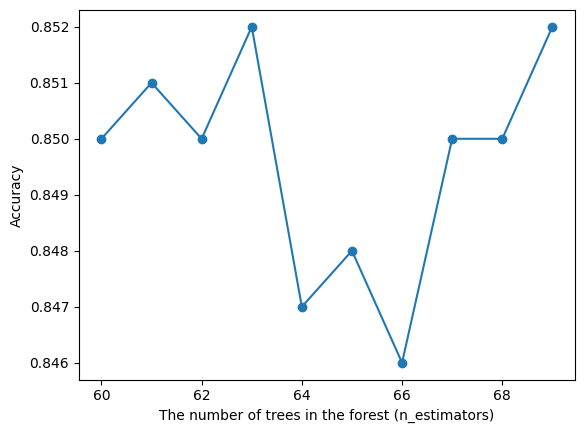

In [ ]:
'''score_lt = []

for i in range(60,70):
    rfc = RandomForestClassifier(n_estimators=i
                                ,random_state=1)
    rfc.fit(X_train, y_train)
    score = round(rfc.score(X_test, y_test), 3)
    score_lt.append(score)
score_max = max(score_lt)
print('Maximum Accuracy：{}'.format(score_max),
      'Numbers of Subtrees：{}'.format(score_lt.index(score_max)+60))

x = np.arange(60,70)
plt.subplot(111)
plt.plot(x, score_lt, 'o-')
plt.ylabel('Accuracy')
plt.xlabel('The number of trees in the forest (n_estimators)')
plt.show()'''

In [ ]:
param_grid = {'n_estimators': np.arange(205, 215)}
#use gridsearch to test all values for n_neighbors
GS = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5)
GS.fit(X_train, y_train)
print(GS.cv_results_)
best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'mean_fit_time': array([3.38290625, 2.6444047 , 2.66095505, 2.66103487, 2.69090419,
       2.68107667, 2.69538021, 2.70096064, 2.8147686 , 2.72307205]), 'std_fit_time': array([0.89216645, 0.36272906, 0.33199311, 0.31978219, 0.27856371,
       0.25911135, 0.25063883, 0.27883868, 0.41246043, 0.33838572]), 'mean_score_time': array([0.0659904 , 0.04776931, 0.04678159, 0.0476265 , 0.04713669,
       0.05251789, 0.04769711, 0.04861135, 0.0460423 , 0.04972005]), 'std_score_time': array([0.03927086, 0.00627831, 0.00451334, 0.00311349, 0.00401843,
       0.00724913, 0.00336687, 0.00382118, 0.00163599, 0.0041141 ]), 'param_n_estimators': masked_array(data=[205, 206, 207, 208, 209, 210, 211, 212, 213, 214],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 205}, {'n_estimators': 206}, {'n_estimators': 207}, {'n_estimators': 208}, {'n_estimators': 209}, {'n_esti

In [ ]:
# Use Grid Search to tune max_depth
param_grid = {'max_depth':np.arange(15,25)}
GS = GridSearchCV(RandomForestClassifier(random_state=1,n_estimators=213), param_grid, cv=5)
GS.fit(X_train, y_train)
best_param1 = GS.best_params_
best_score1 = GS.best_score_
print(best_param1, best_score1)

{'max_depth': 24} 0.8571874652781768


In [ ]:
# Build the random forest with optimized n_estimators and max_depth
rf_rfc_opt = RandomForestClassifier(n_estimators=213, max_depth=24, random_state=1)
rf_rfc_opt.fit(X_train, y_train)
score_rfc = rf_rfc_opt.score(X_test, y_test)
print('Maximum Accuracy：{}'.format(score_rfc),
      'Numbers of Subtrees：213',
      'The maximum depth of the tree：24')
print('training accuracy = ' + str(rf_rfc_opt.score(X_train, y_train)))
print('test accuracy = ' + str(score_rfc))

Maximum Accuracy：0.8561946902654868 Numbers of Subtrees：213 The maximum depth of the tree：24
training accuracy = 0.9850539717686133
test accuracy = 0.8561946902654868


In [ ]:
from sklearn.metrics import recall_score
y_pred = rf_cla.predict(X_test)
recall = recall_score(y_test, y_pred, average='macro')
print('test recall = ' + str(round(recall, 3)))

test recall = 0.698


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='macro')
print('test precision = ' + str(round(precision, 3)))

test precision = 0.79


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print('test f1_score = ' + str(round(f1, 3)))

test f1_score = 0.733


## Feature Importance

Text(0, 0.5, 'Gini Importance')

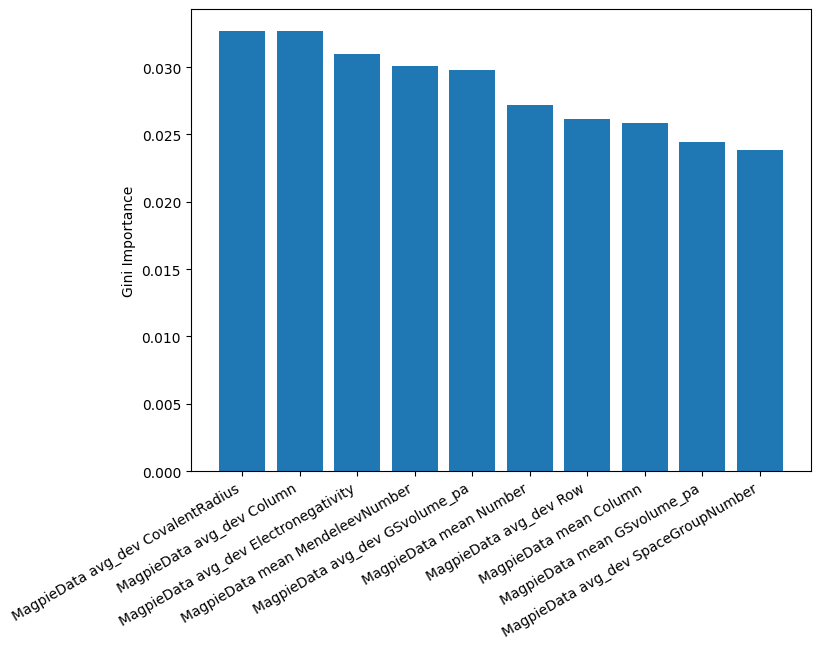

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)

importances = rf_cla.feature_importances_
included = X.columns.values
indices = np.argsort(importances)[::-1]
plt.bar(included[indices][0:10], importances[indices][0:10])
plt.xticks(rotation=30, ha='right')
plt.ylabel('Gini Importance')

# **KNN**

Test scores：[0.792, 0.759, 0.783, 0.783, 0.783, 0.778, 0.782, 0.773, 0.774, 0.779, 0.778, 0.781, 0.782, 0.771] Maximum test score at N：1


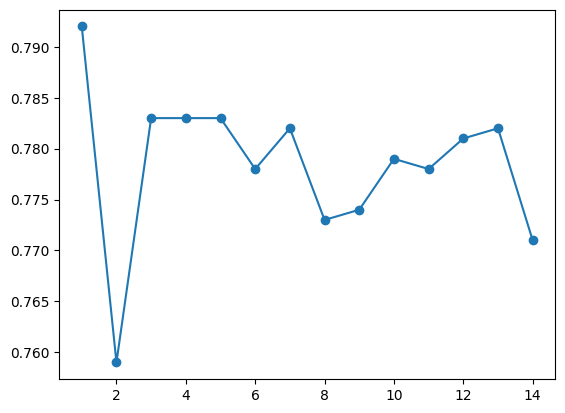

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def KNN_model_changeN(N):
    classifier_KNN = KNeighborsClassifier(n_neighbors=N)

    classifier_KNN.fit(X_train, y_train)

    #print('training accuracy = ' + str(round(classifier_KNN.score(X_train, y_train), 3)))
    #print('test accuracy = ' + str(round(classifier_KNN.score(X_test, y_test), 3)))

    return classifier_KNN.score(X_test, y_test)

score_knn=[]
for i in range(1,15):
    KNN_test_score=round(KNN_model_changeN(i), 3)
    score_knn.append(KNN_test_score)
score_knn_max = max(score_knn)
print('Test scores：{}'.format(score_knn),
      'Maximum test score at N：{}'.format(score_knn.index(score_knn_max)*10+1))
plt.plot(list(range(1,15)), score_knn, 'o-')

In [ ]:
    classifier_KNN = KNeighborsClassifier(n_neighbors=108)

    classifier_KNN.fit(X_train, y_train)

    print('training accuracy = ' + str(round(classifier_KNN.score(X_train, y_train), 3)))
    print('test accuracy = ' + str((classifier_KNN.score(X_test, y_test), 3)))

from sklearn.metrics import accuracy_score
y_pred = classifier_KNN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)#same as classifier_KNN.score

training accuracy = 0.718
test accuracy = (0.7146017699115044, 3)
0.7146017699115044


In [59]:
import seaborn as sns
k_values = [i for i in range (1,20)]
scores = []
X1 = X.drop('comp', axis=1)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))
import plotly.express as px
fig = px.scatter(x=k_values, y=scores,labels={'x':"K Values",'y':"Accuracy Score"})
fig.show()
#px.xlabel("K Values")
#px.ylabel("Accuracy Score")

Test scores：[0.792, 0.778, 0.757, 0.735, 0.725, 0.726, 0.715, 0.707, 0.705, 0.715, 0.716, 0.712, 0.709, 0.708, 0.711] Maximum test score at N：1


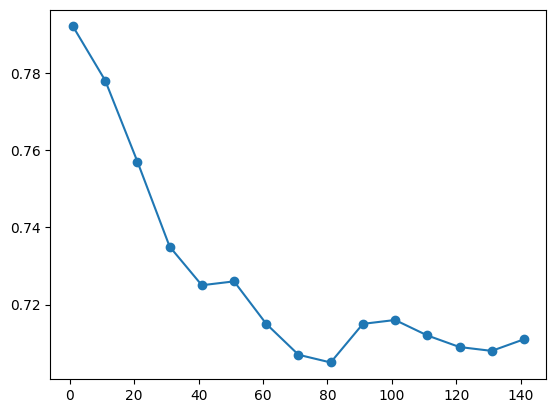

In [ ]:
score_knn=[]
for i in range(1,150,10):
    KNN_test_score=round(KNN_model_changeN(i), 3)
    score_knn.append(KNN_test_score)
score_knn_max = max(score_knn)
print('Test scores：{}'.format(score_knn),
      'Maximum test score at N：{}'.format(score_knn.index(score_knn_max)*10+1))
plt.plot(list(range(1,150,10)), score_knn, 'o-')

In [58]:
print(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5))

[0.76901798 0.80497925 0.79806362 0.79362881 0.77839335]


In [62]:
(0.76901798+0.80497925+0.79806362+0.79362881+0.77839335)/5


0.788816602

In [61]:
knn_opt=KNeighborsClassifier(n_neighbors=1)
knn_opt.fit(X_train, y_train)
print(knn_opt.score(X_test, y_test))

0.7920353982300885


In [63]:
print(knn_opt.score(X_train, y_train))

0.9817326321616385


In [ ]:
#import seaborn as sns
#sns.set_style("whitegrid")
#sns.pairplot(df, hue="gfa{AM,AC,CR}", height=3)
#plt.show()

#import plotly.express as px
#fig = px.scatter_3d(df, x='MagpieData avg_dev CovalentRadius', y='MagpieData avg_dev Column', z='MagpieData avg_dev Electronegativity',
#              color='gfa{AM,AC,CR}')
#fig.show()

#fig = px.scatter(df, x='MagpieData avg_dev CovalentRadius', y='MagpieData avg_dev Column', color='gfa{AM,AC,CR}')
#fig.show()
y_score = classifier_KNN.predict_proba(X_test)[:, 1]

In [ ]:
"""import plotly.express as px
from sklearn.datasets import make_moons

# Fit the model on training data, predict on test data
clf = KNeighborsClassifier(15)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()"""

# **SVM**

In [ ]:
#Splitting the dataset into training and test samples

data3 = df.drop(["comp", "composition", "composition_oxid"], axis=1)
#from sklearn.model_selection import train_test_split
training_set3, test_set3 = train_test_split(data3, test_size = 0.2, random_state = 1)

#Classifying the predictors and target

svm_X_train = training_set3.drop("gfa{AM,AC,CR}",axis=1)
svm_y_train = training_set3.iloc[:,0].values
svm_X_test = test_set3.drop("gfa{AM,AC,CR}",axis=1)
svm_y_test = test_set3.iloc[:,0].values

#Initializing Support Vector Machine and fitting the training data

from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state = 1)
svm_classifier.fit(svm_X_train,svm_y_train)

#Predicting the classes for test set

svm_y_pred = svm_classifier.predict(svm_X_test)

#print(svm_y_pred)
#Attaching the predictions to test set for comparing
test_set3["Predictions"] = svm_y_pred

#We will calculate the accuracy using the confusion matrix as follows :

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(svm_y_test,svm_y_pred)
accuracy = float(cm.diagonal().sum())/len(svm_y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)



Accuracy Of SVM For The Given Dataset :  0.7477876106194691


In [ ]:
svm_classifier.fit(X_train,y_train)
svm_y_pred = svm_classifier.predict(svm_X_test)
accuracy = float(cm.diagonal().sum())/len(svm_y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.7477876106194691


In [50]:
svm_classifier1 = SVC(kernel='rbf', random_state = 1,gamma=0.001)
svm_classifier1.fit(X_train,y_train)
svm_y_pred1 = svm_classifier1.predict(X_test)

#print(svm_y_pred)
#Attaching the predictions to test set for comparing
test_set3["Predictions1"] = svm_y_pred1

#We will calculate the accuracy using the confusion matrix as follows :

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,svm_y_pred1)
accuracy1 = float(cm1.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy1)


Accuracy Of SVM For The Given Dataset :  0.7876106194690266


In [54]:
print(cross_val_score(svm_classifier1, X_train, y_train, cv=5))

[0.7648686  0.78008299 0.78284924 0.77562327 0.76177285]


In [55]:
(0.7648686+0.78008299+0.78284924+0.77562327+0.76177285)/5

0.77303939

In [56]:
print(svm_classifier1.score(X_train, y_train))

0.9094934957099363


In [53]:
svm_classifier2 = SVC(kernel='poly', random_state = 1,degree=20)
svm_classifier2.fit(X_train,y_train)
svm_y_pred2 = svm_classifier2.predict(X_test)

#print(svm_y_pred)
#Attaching the predictions to test set for comparing
test_set3["Predictions2"] = svm_y_pred2

#We will calculate the accuracy using the confusion matrix as follows :

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,svm_y_pred2)
accuracy2 = float(cm2.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy2)
#accuracy3 = accuracy_score(y_test,svm_y_pred2)*100
#print(accuracy3)


Accuracy Of SVM For The Given Dataset :  0.7013274336283186


In [ ]:
'''from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Apples Vs Oranges')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()'''

# **Prediction Step**

In [ ]:
print('Enter composition for testing (e.g. Al94Ce6Co0, Al90Ce5Cu5): ')
CompoundName = input()
#
newData = pd.DataFrame(data={'comp':[CompoundName]})
# Add features
newData = StrToComposition().featurize_dataframe(newData, "comp")
new_ep_feat = ElementProperty.from_preset(preset_name="magpie")
newData = new_ep_feat.featurize_dataframe(newData, col_id="composition")
newData = CompositionToOxidComposition().featurize_dataframe(newData, "composition", ignore_errors=True)
new_os_feat = OxidationStates()
newData = new_os_feat.featurize_dataframe(newData, "composition_oxid", ignore_errors=True)
newData.head()
X2=newData.drop(['comp',"composition", "composition_oxid"], axis=1)

try:
  output=clf.predict(X2)#KNN model
  if output[0]==0:
    print('KNN model suggests that this ternay is likely to be both amorphorous and crystalline.')
  elif output[0]==1:
    print('KNN model suggests that this ternay is likely to be amorphorous.')
  elif output[0]==2:
    print('KNN model suggests that this ternay is likely to be crystalline.')
except:
  print('Incomplete database to use KNN model.')

try:
  rf_output = rf_cla.predict(X2)#random forest model
  if rf_output[0]==0:
    print('Random forest model suggests that this ternay is likely to be both amorphorous and crystalline.')
  elif rf_output[0]==1:
    print('Random forest model suggests that this ternay is likely to be amorphorous.')
  elif rf_output[0]==2:
    print('Random forest model suggests that this ternay is likely to be crystalline.')
except:
  print('Incomplete database to use Random forest model.')
try:
  svm_output = svm_classifier.predict(X2)#SVM model
  if svm_output[0]=='AC':
    print('SVM model suggests that this ternay is likely to be both amorphorous and crystalline.')
  elif svm_output[0]=='AM':
    print('SVM model suggests that this ternay is likely to be amorphorous.')
  elif svm_output[0]=='CR':
    print('SVM model suggests that this ternay is likely to be crystalline.')
except:
  print('Incomplete database to use SVM model.')